In [1]:
import numcodecs
import zarr
import os

In [2]:
%load_ext autoreload

In [3]:
%autoreload 2

In [4]:
import h5py

In [5]:
import cosilico_py.preprocessing.platform_helpers.x10 as x10
from cosilico_py.config import get_config

In [6]:
import typer
from pathlib import Path
import json

In [7]:
from dotenv import load_dotenv
from supabase import create_client

In [8]:
load_dotenv(dotenv_path='../../.env')
load_dotenv(dotenv_path='../../.env.test')

True

In [9]:
from cosilico_py.models import X10XeniumInput, DirectoryEntity, ExperimentViewSetting
from cosilico_py.client.client import CosilicoClient
from cosilico_py.config import get_config

In [10]:
def save_config(email, password):
    app_dir = typer.get_app_dir('cosilico_py')
    config_path: Path = Path(app_dir) / "config.json"
    d = {
        'api_url': os.environ.get('API_URL'),
        'anon_key': os.environ.get('ANON_KEY'),
#         'cache_dir': str((Path(app_dir) / 'cache').absolute()),
        'cache_dir': '~/Downloads/temp_cache',
        'email': email,
        'password': password,
        'preprocessing': {
            'layer': {
                'cells_max_vert_map': {
                    1: 64,
                    2: 64,
                    4: 64,
                    8: 64,
                    16: 64,
                    32: 64,
                    64: 64,
                    128: 64,
                    256: 64,
                    512: 64,
                    1024: 64,
                    2048: 64,
                    4096: 64,
                    8192: 8,
                    16384: 8,
                    32768: 8,
                    65536: 8,
                    131072: 8,
                    262144: 8,
                    524288: 8,
                    1048576: 8,
                },
                'cells_downsample_map': {
                    1: -1,
                    2: -1,
                    4: -1,
                    8: -1,
                    16: -1,
                    32: -1,
                    64: -1,
                    128: -1,
                    256: -1,
                    512: -1,
                    1024: -1,
                    2048: -1,
                    4096: -1,
                    8192: 100_000,
                    16384: 100_000,
                    32768: 100_000,
                    65536: 100_000,
                    131072: 100_000,
                    262144: 100_000,
                    524288: 100_000,
                    1048576: 100_000,
                },
                'cells_object_type_map': {
                    1: 'polygon',
                    2: 'polygon',
                    4: 'polygon',
                    8: 'polygon',
                    16: 'polygon',
                    32: 'polygon',
                    64: 'polygon',
                    128: 'polygon',
                    256: 'polygon',
                    512: 'polygon',
                    1024: 'polygon',
                    2048: 'polygon',
                    4096: 'polygon',
                    8192: 'polygon',
                    16384: 'polygon',
                    32768: 'polygon',
                    65536: 'polygon',
                    131072: 'polygon',
                    262144: 'polygon',
                    524288: 'polygon',
                    1048576: 'polygon',
                }
            }
        }

    }

    Path(d['cache_dir']).mkdir(parents=True, exist_ok=True)


    json.dump(d, open(config_path, 'w'))

def autocreate_client(email, password):
    save_config(email, password)
    client = CosilicoClient()
    client.sign_in()
    return client
    
    

In [11]:
# this is for doing the admin only
supabase = create_client(os.environ.get('API_URL'), os.environ.get('ANON_KEY'))
supabase

In [12]:
response = supabase.auth.sign_up(
    {
        "email": os.environ.get('TEST_ADMIN_EMAIL'),
        "password": os.environ.get('TEST_ADMIN_PASSWORD'),
        'options': {
            'data': {
                'name': os.environ.get('TEST_ADMIN_NAME'),
            }
        }
    }
)
response

AuthResponse(user=User(id='f22d16ff-fc2c-4a46-99dc-ad4e0f712f1d', app_metadata={'provider': 'email', 'providers': ['email']}, user_metadata={'email': 'admin@gmail.com', 'email_verified': True, 'name': 'Admin Lenny', 'phone_verified': False, 'sub': 'f22d16ff-fc2c-4a46-99dc-ad4e0f712f1d'}, aud='authenticated', confirmation_sent_at=None, recovery_sent_at=None, email_change_sent_at=None, new_email=None, new_phone=None, invited_at=None, action_link=None, email='admin@gmail.com', phone='', created_at=datetime.datetime(2025, 7, 21, 21, 28, 41, 587050, tzinfo=TzInfo(UTC)), confirmed_at=None, email_confirmed_at=datetime.datetime(2025, 7, 21, 21, 28, 41, 607227, tzinfo=TzInfo(UTC)), phone_confirmed_at=None, last_sign_in_at=datetime.datetime(2025, 7, 21, 21, 28, 41, 610693, tzinfo=TzInfo(UTC)), role='authenticated', updated_at=datetime.datetime(2025, 7, 21, 21, 28, 41, 616593, tzinfo=TzInfo(UTC)), identities=[UserIdentity(id='f22d16ff-fc2c-4a46-99dc-ad4e0f712f1d', identity_id='4f17472d-398c-441e-

In [13]:
## change to admin in terminal

In [14]:
client = autocreate_client(os.environ.get('TEST_ADMIN_EMAIL'), os.environ.get('TEST_ADMIN_PASSWORD'))

Sign-in successful. 💥

In [15]:
client.create_user(os.environ.get('TEST_USER1_EMAIL'), os.environ.get('TEST_USER1_PASSWORD'), os.environ.get('TEST_USER1_NAME'))
client.create_user(os.environ.get('TEST_USER2_EMAIL'), os.environ.get('TEST_USER2_PASSWORD'), os.environ.get('TEST_USER2_NAME'))


User created -- user1@gmail.com.

User created -- user2@gmail.com.

In [21]:
client = autocreate_client(os.environ.get('TEST_USER1_EMAIL'), os.environ.get('TEST_USER1_PASSWORD'))

Sign-in successful. 💥

In [17]:
client.create_directory('/project_a/subproject_a/zzz', permission='rw')

Directory successfuly created at project_a/subproject_a/zzz

In [18]:
client.display_experiments()

Permission level 🔑: read write delete

└── 📁 project_a

└── 📁 subproject_a

└── 📁 zzz

In [19]:
x_input = X10XeniumInput(
    cellranger_outs='/Users/erikstorrs/Downloads/Xenium_Prime_Breast_Cancer_FFPE_outs',
    bbox=(25000, 28000, 25000, 28000),
    to_uint8=True
)
x_input

X10XeniumInput(name=None, bbox=[25000, 28000, 25000, 28000], verbose=True, platform=<PlatformEnum.x10_xenium: '10X Xenium'>, cellranger_outs=PosixPath('/Users/erikstorrs/Downloads/Xenium_Prime_Breast_Cancer_FFPE_outs'), to_uint8=True)

In [22]:
bundle = client.create_experiment(x_input)

Loading xenium experiment from /Users/erikstorrs/Downloads/Xenium_Prime_Breast_Cancer_FFPE_outs

Loading xenium morphology image from 
/Users/erikstorrs/Downloads/Xenium_Prime_Breast_Cancer_FFPE_outs/morphology_focus/morphology_focus_0002.ome.tif

<tifffile.TiffFile 'morphology_focus_0002.ome.tif'> OME series cannot read multi-file pyramids


Loading xenium transcripts from 
/Users/erikstorrs/Downloads/Xenium_Prime_Breast_Cancer_FFPE_outs/transcripts.parquet

Loading xenium transcript metadata for ['qv']

/Users/erikstorrs/Documents/viewer/cosilico-py/src/cosilico_py/preprocessing/core/tiling.py:28: RuntimeWarning: divide by zero encountered in remainder
  groups = np.arange(num_feats) % group_size  # Vectorized operation


TypeError: unsupported operand type(s) for /: 'str' and 'str'

In [13]:
# store = zarr.storage.ZipStore(bundle.layers[0].local_path, mode='r')
# root = zarr.group(store=store)
# print(root.tree())
# store.close()

In [19]:
client.upload_experiment(bundle, '/project_a/subproject_a/zzz')

Experiment Xenium Prime + 100g Custom-Breast_Cancer successfuly uploaded 🔬!

In [20]:
client.display_experiments()

Permission level 🔑: read write delete

└── 📁 project_a

└── 📁 subproject_a

└── 📁 zzz

└── 🔬 Xenium Prime + 100g Custom-Breast_Cancer

In [14]:
experiment = client.get_experiment('/project_a/subproject_a/zzz/Xenium Prime + 100g Custom-Breast_Cancer')
experiment

experiment=Experiment(id='78cb5375-ee87-4db3-8886-33fa5d1b22f0', version='v0.0.1', experiment_date=datetime.datetime(2024, 6, 13, 21, 22, 41, tzinfo=TzInfo(UTC)), name='Xenium Prime + 100g Custom-Breast_Cancer', platform=<PlatformEnum.x10_xenium: '10X Xenium'>, platform_version='Xenium Human 5K with Cell Typing + HPV-16/18 and SNV Add-on', metadata={'images': {'morphology_filepath': 'morphology.ome.tif', 'morphology_focus_filepath': 'morphology_focus/morphology_focus_0000.ome.tif'}, 'roi_uuid': 'e5a4fad5-39e3-4384-9f8c-db622edf2edc', 'run_name': 'Xenium Prime + 100g Custom', 'slide_id': 'N/A', 'num_cells': 699110, 'well_uuid': 'def_80e6a2bf_rec_7bec5313', 'panel_name': 'Xenium Human 5K with Cell Typing + HPV-16/18 and SNV Add-on', 'panel_type': 'add_on', 'pixel_size': 0.2125, 'region_area': 155159780.84984374, 'region_name': 'Breast_Cancer', 'z_step_size': 3.0, 'analysis_uuid': '548c50c8-df31-4c59-bf52-092b20eae35a', 'cassette_name': 'N/A', 'cassette_uuid': '1437a018-edbe-4856-84b6-fdd

In [15]:
experiment.layers

[Layer(id='98ade449-23d5-43e9-9af8-e86ef930acd7', version='v0.0.1', experiment_id='78cb5375-ee87-4db3-8886-33fa5d1b22f0', name='Cells', is_grouped=False, metadata={}, tags=[], local_path='/Users/erikstorrs/Downloads/temp_cache/98ade44923d543e99af8e86ef930acd7.zarr.zip', path='98ade44923d543e99af8e86ef930acd7.zarr.zip'),
 Layer(id='e591e737-0901-4aa7-9bba-7e6f82a87bc5', version='v0.0.1', experiment_id='78cb5375-ee87-4db3-8886-33fa5d1b22f0', name='Transcripts', is_grouped=True, metadata={}, tags=[], local_path='/Users/erikstorrs/Downloads/temp_cache/e591e73709014aa79bba7e6f82a87bc5.zarr.zip', path='e591e73709014aa79bba7e6f82a87bc5.zarr.zip')]

In [16]:
layer_metadatas = experiment.get_layer_metadata(experiment.layers[0])
[lm.name for lm in layer_metadatas]

['Transcript Counts']

In [17]:
arr = experiment.generate_image_data(experiment.images[0])
arr

dask.array<reshape, shape=(3072, 3072, 1, 4, 1), dtype=uint8, chunksize=(512, 512, 1, 1, 1), chunktype=numpy.ndarray>

In [18]:
layer = experiment.get_layer('Transcripts')
df = experiment.generate_layer_data(layer)
df

,x_location,y_location,feature_name,counts,QV
id,,,,,
282406984613900,681.101562,2080.072266,STIM1,1.0,31.00
282406984613956,684.410156,1912.500000,RARA,1.0,31.25
282406984613958,687.867188,2239.851562,HUWE1,1.0,40.00
282406984613969,678.750000,528.013672,CD300C,1.0,40.00
282406984613979,688.013672,2141.910156,PAK1IP1,1.0,34.75
...,...,...,...,...,...
282548719750377,720.146484,2405.146484,SOD1,1.0,40.00
282548719750387,728.529297,2715.367188,FLII,1.0,40.00
282548719750395,731.029297,2417.205078,TMEM106B,1.0,40.00


In [19]:
# store = zarr.storage.ZipStore(experiment.layers[1].local_path, mode='r')
# root = zarr.group(store=store)
# print(root.tree())

In [20]:
# ids = root['metadata/ids/4096'][:]
# len(set(ids))

In [21]:
layer = experiment.get_layer('Cells')
adata = experiment.generate_layer_data(layer, experiment.get_layer_metadata(layer, metadata_name='Transcript Counts'))
adata

View of AnnData object with n_obs × n_vars = 3100 × 5099
    obsm: 'spatial'


/Users/erikstorrs/Documents/viewer/cosilico-py/src/cosilico_py/client/experiment.py:205: ImplicitModificationWarning: Setting element `.obsm['spatial']` of view, initializing view as actual.
  adata.obsm['spatial'] = df[['x_location', 'y_location']].values


View of AnnData object with n_obs × n_vars = 3100 × 5099
    obsm: 'spatial'

In [23]:
import scanpy as sc
a = adata.copy()
sc.pp.normalize_total(a)
sc.pp.log1p(a)
sc.pp.pca(a)

from sklearn.cluster import KMeans
n_clusters = 10
x = KMeans(n_clusters=n_clusters).fit_transform(a.obsm['X_pca'])
clusters = x.argmax(1)
adata.obs['Kmeans N=10'] = [f'cluster {x}' for x in clusters]
adata.obs

/var/folders/l4/tr_3w7sx31z58xhsnb0_07hw0000gr/T/ipykernel_14402/2772987339.py:11: ImplicitModificationWarning: Trying to modify attribute `.obs` of view, initializing view as actual.
  adata.obs['Kmeans N=10'] = [f'cluster {x}' for x in clusters]


,Kmeans N=10
bbeodhla-1,cluster 4
bbeoeddl-1,cluster 4
bbeognab-1,cluster 4
bbeognch-1,cluster 4
bbeoickk-1,cluster 4
...,...
oanleihg-1,cluster 5
oanlfaan-1,cluster 5
oanmapng-1,cluster 8
oanmbbjc-1,cluster 8


In [25]:
experiment.create_categorical_layer_metadata('Kmeans N=10', adata.obs['Kmeans N=10'], layer)

TypeError: unsupported operand type(s) for /: 'str' and 'str'

In [51]:
lm = experiment.get_layer_metadata(layer, metadata_name='Kmeans N=10')
lm

LayerMetadata(id='846b368a-3231-40f6-8995-9612c919b0b4', version='v0.0.1', layer_id='30a68829-f3ff-467e-9543-a0947cf2725b', name='Kmeans N=10', metadata_type=<MetadataTypeEnum.categorical: 'categorical'>, is_sparse=False, fields=['cluster 0', 'cluster 2', 'cluster 3', 'cluster 4', 'cluster 5', 'cluster 6', 'cluster 7', 'cluster 9'], metadata={}, tags=[], local_path='~/Downloads/temp_cache/846b368a323140f689959612c919b0b4.zarr.zip', path='846b368a323140f689959612c919b0b4.zarr.zip')

In [59]:
lm = experiment.get_layer_metadata(layer, metadata_name='PCAs')
lm

LayerMetadata(id='1e92c411bd27493cbbad6008afc06c84', version='v0.0.1', layer_id='30a68829-f3ff-467e-9543-a0947cf2725b', name='PCAs', metadata_type=<MetadataTypeEnum.continuous: 'continuous'>, is_sparse=False, fields=['PCA 0', 'PCA 1', 'PCA 2', 'PCA 3', 'PCA 4', 'PCA 5', 'PCA 6', 'PCA 7', 'PCA 8', 'PCA 9'], metadata={}, tags=[], local_path=PosixPath('/Users/erikstorrs/Documents/viewer/notebooks/data_preprocessing/~/Downloads/temp_cache/1e92c411bd27493cbbad6008afc06c84.zarr.zip'), path='1e92c411bd27493cbbad6008afc06c84.zarr.zip')

In [60]:
store = zarr.storage.ZipStore(lm.local_path, mode='r')
root = zarr.group(store=store)
level = min([int(x) for x in list(root['object'].array_keys())])
# extract_categorical_metadata(root)

In [58]:
fields = root['metadata/fields'][:]
idxs = root[f'object/{level}'][:]

In [61]:
print(root.tree())

/
 ├── metadata
 │   ├── fields (10,) object
 │   ├── vcenters (10,) float32
 │   ├── vmaxs (10,) float32
 │   └── vmins (10,) float32
 └── object
     └── 4096 (3340, 10) float32


In [62]:
adata = experiment.generate_layer_data(layer, experiment.get_layer_metadata(layer, metadata_name='Kmeans N=10'))
adata

TypeError: unhashable type: 'numpy.ndarray'

In [34]:
import pandas as pd
pca_df = pd.DataFrame(a.obsm['X_pca'][:, :10], columns=[f'PCA {i}' for i in range(10)], index=a.obs.index)
pca_df

,PCA 0,PCA 1,PCA 2,PCA 3,PCA 4,PCA 5,PCA 6,PCA 7,PCA 8,PCA 9
bbeognab-1,2.074785,0.245757,0.023434,-0.204141,0.301105,-0.060961,0.208283,-0.406950,0.383026,-0.363331
bbeoickk-1,1.887419,-0.376444,-0.484318,-0.783920,0.303812,0.477194,0.031323,-0.487669,-0.020543,-0.508676
bbepckka-1,1.526504,0.043352,0.268849,-0.673967,0.024485,0.479700,-0.360783,0.136254,0.121475,0.212064
bbepgdca-1,1.444822,-0.173563,-0.071653,0.204343,0.326968,1.132792,0.412587,-0.774280,0.441762,0.154006
bbepibli-1,1.831075,-0.172490,-0.917230,0.532854,-0.281057,-0.105172,0.297571,-0.182372,0.264083,0.328781
...,...,...,...,...,...,...,...,...,...,...
oanleihg-1,-3.184842,-0.481604,0.098720,-1.368798,2.467735,-1.680424,0.998372,0.083797,-0.362897,-0.378290
oanlfaan-1,-3.321549,-0.629458,0.137379,-1.046023,0.259056,-0.435916,0.135748,0.049861,-0.061737,-0.677602
oanmapng-1,-1.624096,-1.117537,-0.568660,-1.149179,-1.911695,-0.569097,0.430732,-0.210447,-0.385681,0.736354
oanmbbjc-1,-2.271972,-0.928223,-0.115670,-1.440910,-1.031893,-0.359981,-0.584334,-0.560318,-0.427073,-0.787591


In [43]:
experiment.add_continuous_layer_metadata('PCAs', pca_df, layer)

AssertionError: Name must be unique. Name already exists: ['Transcript Counts', 'Kmeans N=10', 'PCAs']

In [ ]:
from cosilico_py.preprocessing.core.layer import write_continuous_ungrouped_layer_metadata
cont_lm = write_continuous_ungrouped_layer_metadata(
    layer.id, ## layer_id: Annotated[str, 'ID of the parent layer.'],
    'PCAs', # name: Annotated[str, 'Name of the Layer Metadata.'],
    pca_df, # values_df: Annotated[pd.DataFrame, 'Dataframe with continuous variables we are writing for this variable group. Must be in the same order as the IDs on the parent layer and index must be entity IDs from the parent layer.'],
    layer.local_path, # parent_zarr_path: Annotated[str, 'Filepath to parent layer zarr.'],
    '~/Downloads/temp_cache', # output_directory: Annotated[os.PathLike, 'Directory in which to write the .zarr.zip file.'],
)

In [ ]:
cont_lm = experiment.add_continuous_layer_metadata(
    
)

In [216]:
arr

dask.array<array, shape=(902513,), dtype=float32, chunksize=(71998,), chunktype=numpy.ndarray>

In [57]:
image = experiment.images[0]
image

Image(id='cda6c46a-6f0c-47f4-8ce6-cf880d82f127', version='v0.0.1', experiment_id='dcda370a-7990-41bc-9ee3-a85ada5f1c61', name='Xenium Morphology', metadata=OME(
   plates=[{'id': 'Plate:0', 'well_origin_x': 0.0, 'well_origin_x_unit': <UnitsLength.MICROMETER: 'µm'>, 'well_origin_y': 0.0, 'well_origin_y_unit': <UnitsLength.MICROMETER: 'µm'>}],
   instruments=[{'microscope': {'manufacturer': '10x Genomics', 'model': 'Xenium', 'kind': 'microscope'}, 'id': 'Instrument:0'}],
   images=[<1 field_type>],
   structured_annotations={'map_annotations': [{'id': 'Annotation:0', 'value': {'Purpose': 'Nuclear'}, 'kind': 'mapannotation'}, {'id': 'Annotation:1', 'value': {'Purpose': 'Boundary'}, 'kind': 'mapannotation'}, {'id': 'Annotation:2', 'value': {'Purpose': 'Interior - RNA'}, 'kind': 'mapannotation'}, {'id': 'Annotation:3', 'value': {'Purpose': 'Interior - Protein'}, 'kind': 'mapannotation'}]},
   uuid='urn:uuid:fddd3688-7c75-11ef-a04f-067698406db1',
), tags=[], local_path='~/Downloads/temp_cach

In [58]:
store = zarr.storage.ZipStore(image.local_path, mode='r')
root = zarr.group(store=store)

In [63]:
print(root.tree())

/
 └── zooms
     ├── 2048
     │   └── tiles (2, 2, 1, 4, 1, 512, 512) uint8
     ├── 512
     │   └── tiles (6, 6, 1, 4, 1, 512, 512) uint8
     └── 8192
         └── tiles (1, 1, 1, 4, 1, 512, 512) uint8


In [86]:
import numpy as np
min([int(x) for x in list(root['zooms'].group_keys())])

512

In [64]:
import dask.array as da

In [70]:
arr = da.from_zarr(root['zooms/512/tiles'])
arr

dask.array<from-zarr, shape=(6, 6, 1, 4, 1, 512, 512), dtype=uint8, chunksize=(1, 1, 1, 1, 1, 512, 512), chunktype=numpy.ndarray>

In [73]:
a, b, c, d, e, f, g = arr.shape
r_arr = da.einsum('abcdefg->afbgcde', arr)
r_arr = r_arr.reshape(a * f, b * g, c, d, e)
r_arr

dask.array<reshape, shape=(3072, 3072, 1, 4, 1), dtype=uint8, chunksize=(512, 512, 1, 1, 1), chunktype=numpy.ndarray>

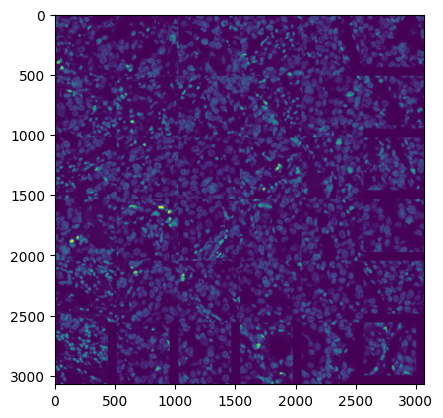

In [75]:
import matplotlib.pyplot as plt
plt.imshow(r_arr[:, :, 0, 0, 0])

In [87]:
narr = r_arr[:, :, 0, 0, 0].compute()

In [88]:
narr

array([[35, 32, 30, ...,  5,  4,  4],
       [36, 33, 32, ...,  5,  4,  4],
       [43, 36, 32, ...,  4,  4,  4],
       ...,
       [44, 42, 42, ...,  0,  0,  0],
       [48, 45, 44, ...,  0,  0,  0],
       [51, 46, 44, ...,  0,  0,  0]], shape=(3072, 3072), dtype=uint8)

In [ ]:
# tx, ty, t, c, z, sy, sx
a, b, c, d, e, f, g = arr.shape

# 1.  Bring the axes you want to fuse next-to-each-other
#     (0,5,1,6,2,3,4)  ≡  (a,f,b,g,c,d,e)
r_arr = da.einsum('abcdefg->afbgcde', x)

# 2.  Collapse the neighbouring pairs with a reshape
x = x.reshape(a * f, b * g, c, d, e)

In [ ]:
tx, ty, t, c, z, sy, sx

In [40]:
from anytree.importer import DictImporter
from anytree import RenderTree
importer = DictImporter()

In [41]:
data = {
    'name': 'root',
    'id': 'lsdkfj',
    'p'
    'children': [
        {
            'name': 'sub0',
            'id': 'aldskfj'
            'children': [
                {
                    'a': 'sub0A',
                    'b': 'foo'
                },
                {
                    'a': 'sub0B'
                }
            ]
        },
        {
            'a': 'sub1'
        }
    ]
}

In [42]:
root = importer.import_(data)

In [43]:
print(RenderTree(root))

AnyNode(a='root')
├── AnyNode(a='sub0')
│   ├── AnyNode(a='sub0A', b='foo')
│   └── AnyNode(a='sub0B')
└── AnyNode(a='sub1')

In [45]:
node = None
for pre, _, node in RenderTree(root):
    print("%s%s" % (pre, node.name))

AttributeError: 'AnyNode' object has no attribute 'name'

In [46]:
node.a

'root'

In [21]:
# response = cc.supabase.functions.invoke(
#     "generate-upload-url",
#     invoke_options={
#         "body": {"filename": "lllll.zarr.zip"},
#     },
# )
# body = json.loads(response.decode())
# signed_url = body['url']
# signed_url

In [22]:
# import requests
# file_path = "/Users/erikstorrs/Library/Application Support/cosilico_py/cache/24eb1d9a1b3b4aa29dc653fd9deeb850.zarr.zip"

# with open(file_path, "rb") as f:
#     response = requests.put(
#         signed_url,
#         data=f,
#         headers={
#             "Content-Type": "application/zip"
#         }
#     )
# response

In [23]:
# response = cc.supabase.functions.invoke(
#     "generate-download-url",
#     invoke_options={
#         "body": {"filename": "lllll.zarr.zip"},
#     },
# )
# body = json.loads(response.decode())
# download_url = body['url']
# download_url

In [24]:
# output_path = "/Users/erikstorrs/Downloads/test.zarr.zip"

# # Download the file
# response = requests.get(download_url)

In [25]:
# with open(output_path, "wb") as f:
#     f.write(response.content)

In [32]:
x_input = X10XeniumInput(
    cellranger_outs='/Users/erikstorrs/Downloads/Xenium_Prime_Breast_Cancer_FFPE_outs',
    bbox=(25000, 28000, 25000, 28000), 
)
x_input

X10XeniumInput(name=None, bbox=[25000, 28000, 25000, 28000], verbose=True, platform=<PlatformEnum.x10_xenium: '10X Xenium'>, cellranger_outs=PosixPath('/Users/erikstorrs/Downloads/Xenium_Prime_Breast_Cancer_FFPE_outs'), to_uint8=False)

In [33]:
bundle = client.create_experiment(x_input)

Loading xenium experiment from /Users/erikstorrs/Downloads/Xenium_Prime_Breast_Cancer_FFPE_outs

Loading xenium morphology image from 
/Users/erikstorrs/Downloads/Xenium_Prime_Breast_Cancer_FFPE_outs/morphology_focus/morphology_focus_0002.ome.tif

<tifffile.TiffFile 'morphology_focus_0002.ome.tif'> OME series cannot read multi-file pyramids


Loading xenium transcripts from 
/Users/erikstorrs/Downloads/Xenium_Prime_Breast_Cancer_FFPE_outs/transcripts.parquet

Loading xenium transcript metadata for ['qv']

/Users/erikstorrs/Documents/viewer/cosilico-py/src/cosilico_py/preprocessing/core/tiling.py:28: RuntimeWarning: divide by zero encountered in remainder
  groups = np.arange(num_feats) % group_size  # Vectorized operation


Loading xenium cell boundaries from 
/Users/erikstorrs/Downloads/Xenium_Prime_Breast_Cancer_FFPE_outs/cell_boundaries.parquet

Loading xenium cell transcript counts 
/Users/erikstorrs/Downloads/Xenium_Prime_Breast_Cancer_FFPE_outs/cell_feature_matrix.h5

In [ ]:
client.create_experiment(x_input)

In [59]:
bundle.layers[0].local_path

PosixPath('/Users/erikstorrs/Library/Application Support/cosilico_py/cache/24eb1d9a1b3b4aa29dc653fd9deeb850.zarr.zip')

In [2]:
from ome_types import from_xml
import tifffile
import dask.array as da

In [19]:
image

ZarrTiffStore

In [20]:
ome_model

OME(
   plates=[{'id': 'Plate:1', 'well_origin_x': -0.0, 'well_origin_x_unit': <UnitsLength.MICROMETER: 'µm'>, 'well_origin_y': -0.0, 'well_origin_y_unit': <UnitsLength.MICROMETER: 'µm'>}],
   instruments=[{'microscope': {'manufacturer': '10x Genomics', 'model': 'Xenium', 'kind': 'microscope'}, 'id': 'Instrument:1'}],
   images=[<1 field_type>],
   uuid='urn:uuid:6f6e3c8f-db12-11ed-a5c7-0644c1d5d2e3',
   creator='tifffile.py 2021.4.8',
)

In [63]:
# ome_tiff_path = '/Users/erikstorrs/Downloads/Xenium_V1_FFPE_Human_Brain_Healthy_With_Addon_outs/morphology_focus.ome.tif'
ome_tiff_path = '/Users/erikstorrs/Downloads/Xenium_V1_FFPE_Human_Brain_Healthy_With_Addon_outs/morphology.ome.tif'
# ome_tiff_path = '/Users/erikstorrs/Downloads/Xenium_Prime_Breast_Cancer_FFPE_outs/morphology_focus/morphology_focus_0002.ome.tif'
# ome_tiff_path = '/Users/erikstorrs/Downloads/Xenium_V1_Human_Ductal_Adenocarcinoma_FFPE_outs/morphology_focus/morphology_focus_0000.ome.tif'
ome_metadata = tifffile.TiffFile(ome_tiff_path).ome_metadata
ome_model = from_xml(ome_metadata)

with tifffile.TiffFile(ome_tiff_path) as tif:
#     z = tif.aszarr()
#     zz = tif.series[0].aszarr()
    z = tif.series[0].pages[0].aszarr()
    image = da.from_zarr(z)
#     image = da.from_zarr(zz)
#     image = da.from_zarr(image, chunks=(1, 2048, 2048))

In [64]:
ome_model.images[0]

Image(
   id='Image:0',
   name='Image0',
   instrument_ref={'id': 'Instrument:1'},
   pixels={'channels': [{'id': 'Channel:0:0', 'name': 'DAPI', 'samples_per_pixel': 1}], 'tiff_data_blocks': [{'plane_count': 13}], 'id': 'Pixels:0', 'dimension_order': <Pixels_DimensionOrder.XYZCT: 'XYZCT'>, 'type': <PixelType.UINT16: 'uint16'>, 'size_x': 36955, 'size_y': 27282, 'size_z': 13, 'size_c': 1, 'size_t': 1, 'physical_size_x': 0.2125, 'physical_size_y': 0.2125, 'physical_size_z': 3.0},
)

In [65]:
for s in tif.series:
    print(len(s.pages), s)
    for p in s.pages:
        print(p)

13 TiffPageSeries 0  'Image0'  13x27282x36955  uint16  ZYX  ome  8 Levels  13 Pages
TiffPage 0 @16  27282x36955  uint16  minisblack tiled jpeg2000  ome
TiffFrame 1 @13939344  27282x36955  uint16
TiffFrame 2 @146243052  27282x36955  uint16
TiffFrame 3 @394109272  27282x36955  uint16
TiffFrame 4 @697471996  27282x36955  uint16
TiffFrame 5 @998401786  27282x36955  uint16
TiffFrame 6 @1298411118  27282x36955  uint16
TiffFrame 7 @1597568094  27282x36955  uint16
TiffFrame 8 @1896267556  27282x36955  uint16
TiffFrame 9 @2195048900  27282x36955  uint16
TiffFrame 10 @2496114066  27282x36955  uint16
TiffFrame 11 @2786268448  27282x36955  uint16
TiffFrame 12 @2959810478  27282x36955  uint16


In [49]:
for p in tif.pages:
    print(p)

TiffPage 0 @16  74945x51265  uint16  minisblack tiled jpeg2000  ome


In [59]:
image

dask.array<from-zarr, shape=(27282, 36955), dtype=uint16, chunksize=(1024, 1024), chunktype=numpy.ndarray>

In [43]:
s = tif.series[0]
s

<tifffile.TiffPageSeries 0 ome>

In [46]:
s.aszarr()

AssertionError: 

In [6]:
import pandas as pd

In [8]:
df = pd.read_csv('/Users/erikstorrs/Downloads/Xenium_Prime_Breast_Cancer_FFPE_outs/metrics_summary.csv')
df

,run_name,cassette_name,region_name,panel_name,panel_design_id,predesigned_panel_id,region_area,total_cell_area,total_high_quality_decoded_transcripts,fraction_transcripts_decoded_q20,...,fraction_of_ambiguous_cell_mask_pixels,fraction_of_nucleus_polygons_removed,fraction_of_cell_polygons_removed,fraction_of_nuclei_without_cell,number_of_cell_non_simple_polygons,number_of_cell_multi_polygons,number_of_nucleus_non_simple_polygons,number_of_nucleus_multi_polygons,segmented_cell_imported_frac,segmented_cell_imported_count
0,Xenium Prime + 100g Custom,NaN,Breast_Cancer,Xenium Human 5K with Cell Typing + HPV-16/18 a...,NaN,hAtlas_v1.1,1.551598e+08,4.553694e+07,80158637,0.86385,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [9]:
df.to_json()

'{"run_name":{"0":"Xenium Prime + 100g Custom"},"cassette_name":{"0":null},"region_name":{"0":"Breast_Cancer"},"panel_name":{"0":"Xenium Human 5K with Cell Typing + HPV-16\\/18 and SNV Add-on"},"panel_design_id":{"0":null},"predesigned_panel_id":{"0":"hAtlas_v1.1"},"region_area":{"0":155159780.8498440087},"total_cell_area":{"0":45536938.5737275034},"total_high_quality_decoded_transcripts":{"0":80158637},"fraction_transcripts_decoded_q20":{"0":0.8638496091},"fraction_predesigned_transcripts_decoded_q20":{"0":0.8662174711},"fraction_custom_transcripts_decoded_q20":{"0":0.8272998337},"nuclear_transcripts_per_100um2":{"0":196.2993157169},"decoded_transcripts_per_100um2":{"0":157.1654402812},"adjusted_negative_control_probe_rate":{"0":0.0013769231},"adjusted_negative_control_codeword_rate":{"0":0.0002238943},"adjusted_genomic_control_probe_rate":{"0":0.0336418666},"negative_control_probe_counts_per_control_per_cell":{"0":0.00002918},"genomic_control_probe_counts_per_control_per_cell":{"0":0

In [11]:
from dateutil import parser

dt = parser.isoparse("2024-06-13T21:22:41Z")
dt

datetime.datetime(2024, 6, 13, 21, 22, 41, tzinfo=tzutc())

In [2]:
print('[bold red]Sign in attempt failed.[/bold red]')

Sign in attempt failed.

In [5]:
print('[green]Sign in successfull.[/green]')

Sign in successfull.

In [2]:
adata = x10.read_10x_h5('/Users/erikstorrs/Downloads/Xenium_Prime_Breast_Cancer_FFPE_outs/cell_feature_matrix.h5')
adata.obs

""
aaaaaohf-1
aaaabkoj-1
aaaafefl-1
aaaahfjm-1
aaaahjao-1
...
oimkalkm-1
oimkankb-1
oimkapok-1
oimkbcmb-1


In [9]:
import pandas as pd
s = pd.Series(pd.Categorical(['a', 'a', 'b', 'd']))
s.cat.categories.to_list()

['a', 'b', 'd']

In [2]:
import pandas as pd
dtype_dict = {
        "feature_name": "category",
        "is_gene": "bool",
        "codeword_category": "category",
        "x_location": "float32",
        "y_location": "float32",
        "transcript_id": "uint64",
        "qv": "float32",
    }
source = pd.read_parquet(
    "/Users/erikstorrs/Downloads/Xenium_Prime_Breast_Cancer_FFPE_outs/transcripts.parquet",
    columns=["feature_name", "is_gene", "codeword_category", "x_location", "y_location", "transcript_id", "qv"],  # Read only needed columns
    engine="pyarrow"  # Ensure efficient Parquet reading
).astype(dtype_dict)  # Convert data types immediately

In [3]:
adata.var

,gene_ids,gene_names
0,ENSG00000166535,A2ML1
1,ENSG00000127837,AAMP
2,ENSG00000131043,AAR2
3,ENSG00000266967,AARSD1
4,ENSG00000183044,ABAT
...,...,...
9470,DeprecatedCodeword_18632,DeprecatedCodeword_18632
9471,DeprecatedCodeword_18637,DeprecatedCodeword_18637
9472,DeprecatedCodeword_18639,DeprecatedCodeword_18639
9473,DeprecatedCodeword_18646,DeprecatedCodeword_18646


In [4]:
adata.X.shape

(699110, 9475)

In [17]:
import zarr
import numpy as np

In [43]:
output_filepath = '/Users/erikstorrs/Downloads/tempjj.zarr.zip'
store = zarr.storage.ZipStore(output_filepath, mode='w')
root = zarr.group(store=store, overwrite=True)
g = root.create_group("g1")
# x = np.asarray(['hello', 'aaaaaaaaddddddddeeeeeeeeeeaaaaaaaaddddddddeeeeeeeeeeaaaaaaaaddddddddeeeeeeeeeeaaaaaaaaddddddddeeeeeeeeeeaaaaaaaaddddddddeeeeeeeeee', 'a', 'b', ',c']).astype(str)
# z = g.create_array("testd", shape=(len(x),), chunks=(len(x),), dtype='U50')
# z[:] = x

x = np.asarray([1,2,3], dtype=np.float32)
z = g.create_array("testa", shape=(len(x),), chunks=(len(x),), dtype='float32')
z[:] = x

root.tree()


/
└── g1
    └── testa (3,) float32

In [44]:
store.close()

In [45]:
store = zarr.storage.ZipStore(output_filepath, mode='w')
root = zarr.group(store=store)
print(root.tree())
store.close()

/

In [22]:
store = zarr.storage.ZipStore(output_filepath, mode='r')
root = zarr.group(store=store)
root['/g1/testd']

ValueError: Store is read-only but mode is 'r+'